In [1]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 와인 데이터 분석
- fixed acidity : 고정산도
- volatile acidity : 휘발성 산도
- citric acid : 구연산
- residual sugar : 잔류당
- chlorides : 염화물
- free sulfur dioxide : 이산화 황산가스
- total sulfur dioxide : 총 이산화황
- density : 밀도
- pH : 산도
- sulphates : 황산염
- alcohol : 알콜농도
- quality : 품질

In [14]:
df=pd.read_csv('data/21.09.13 학습자료/9월14일 집계EDA실습 및 분류분석 미션포함/data/winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.shape

(1599, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


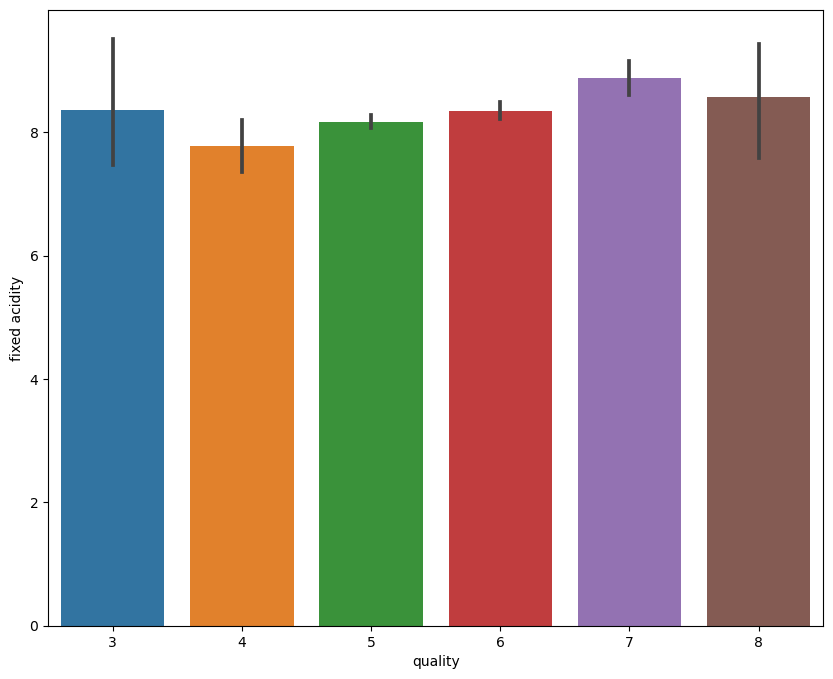

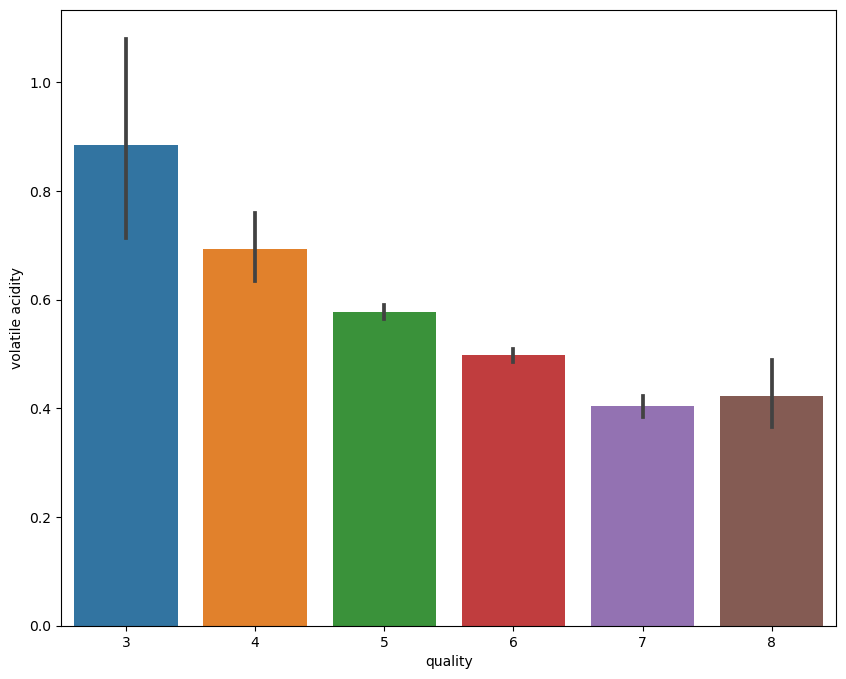

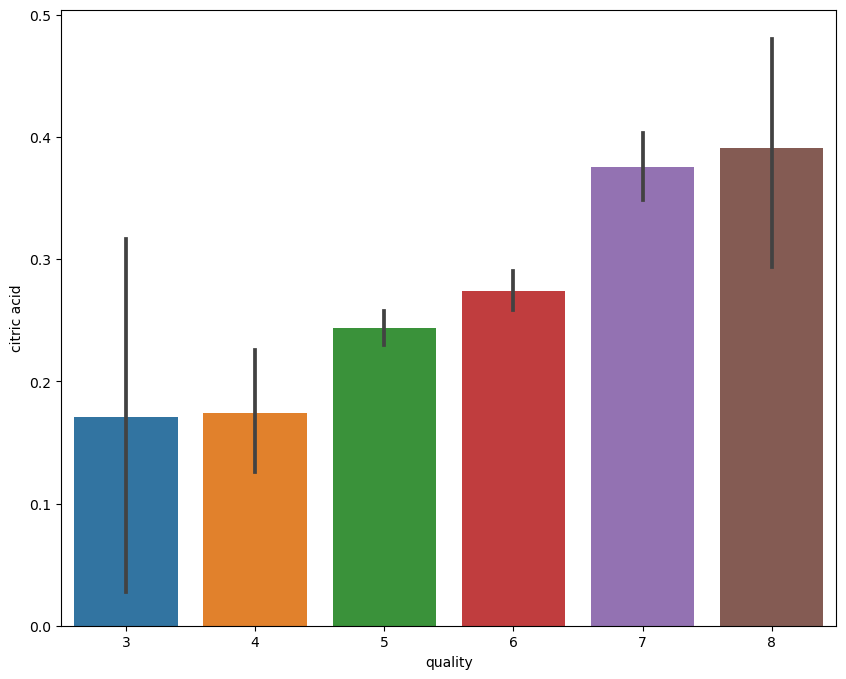

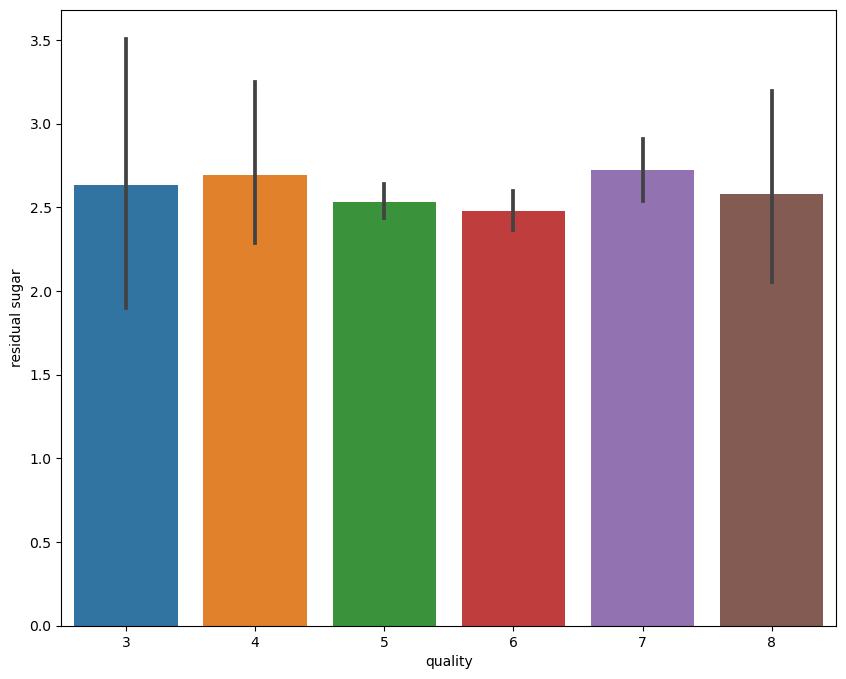

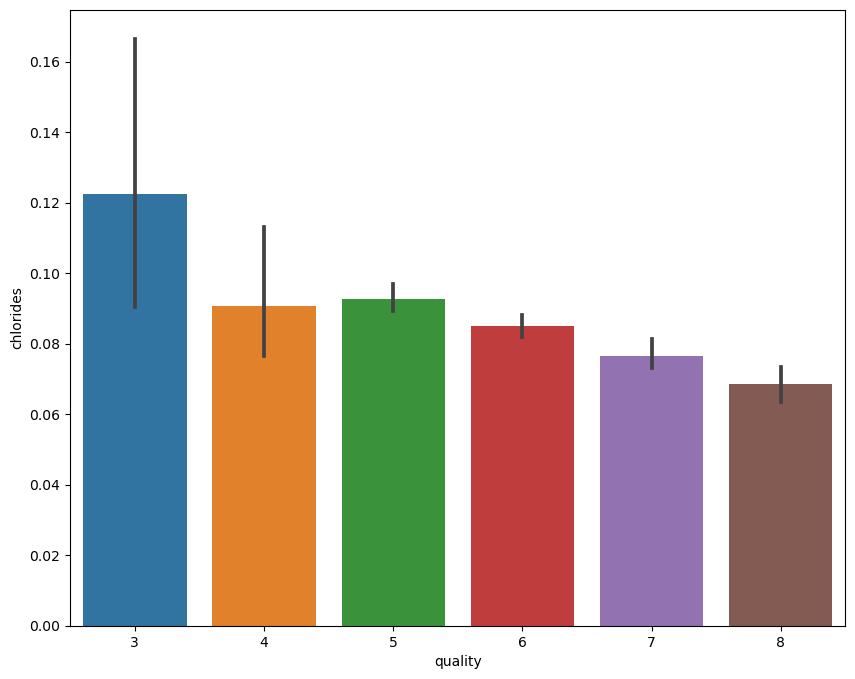

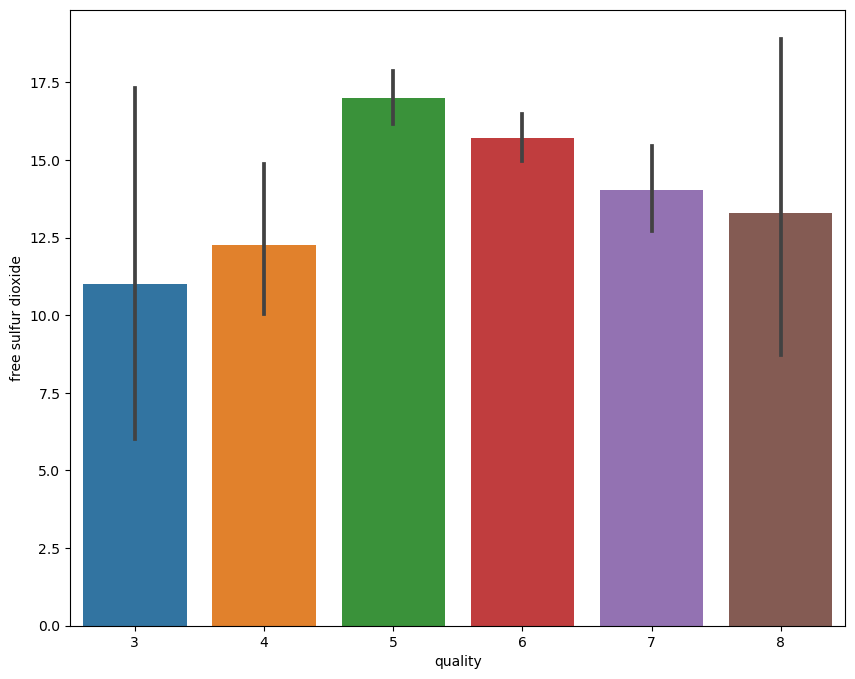

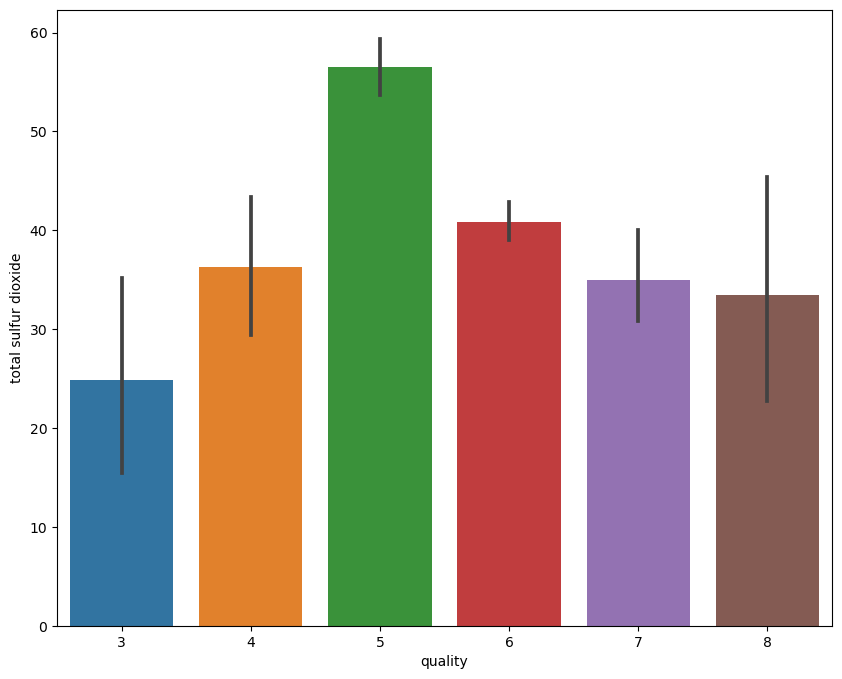

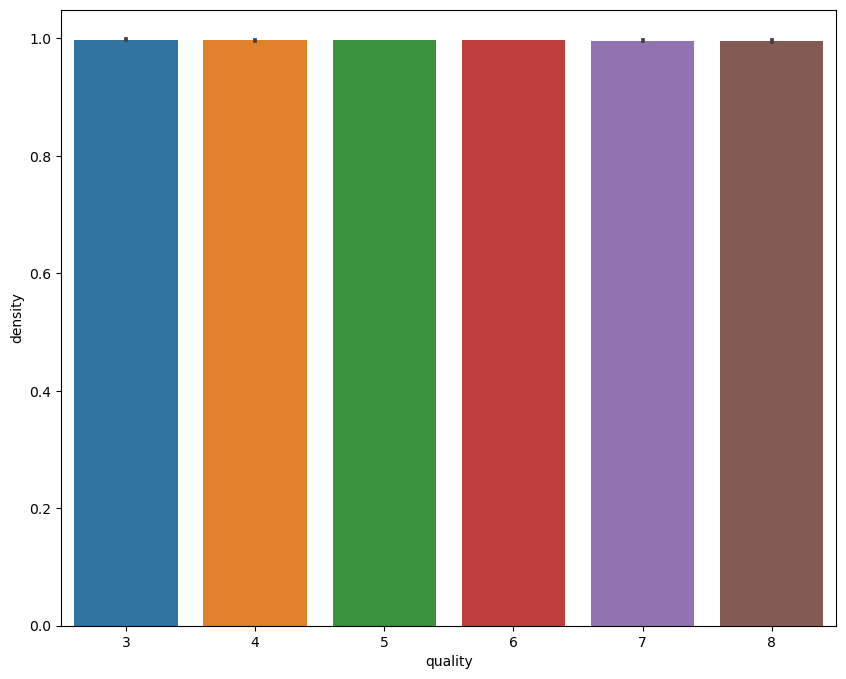

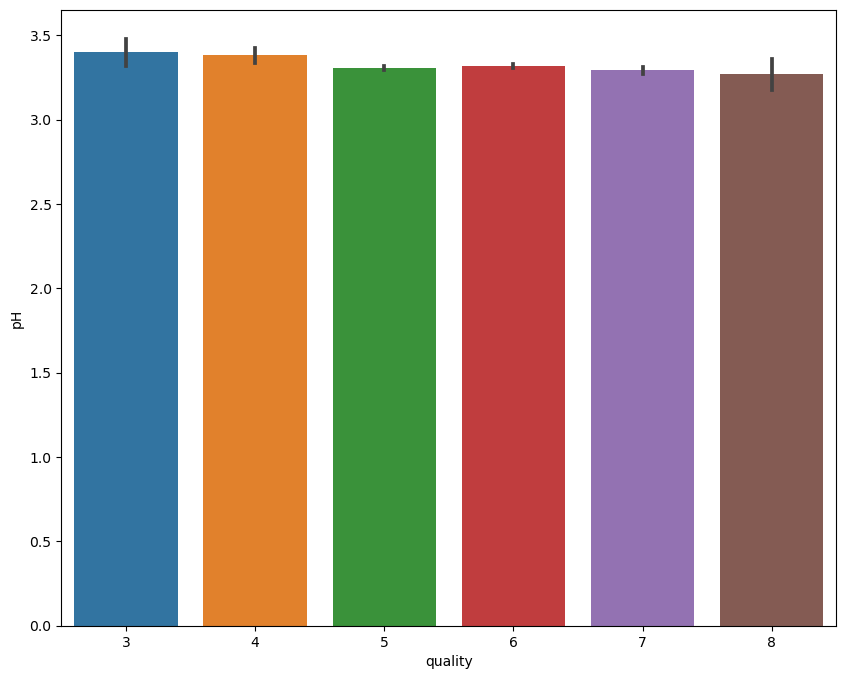

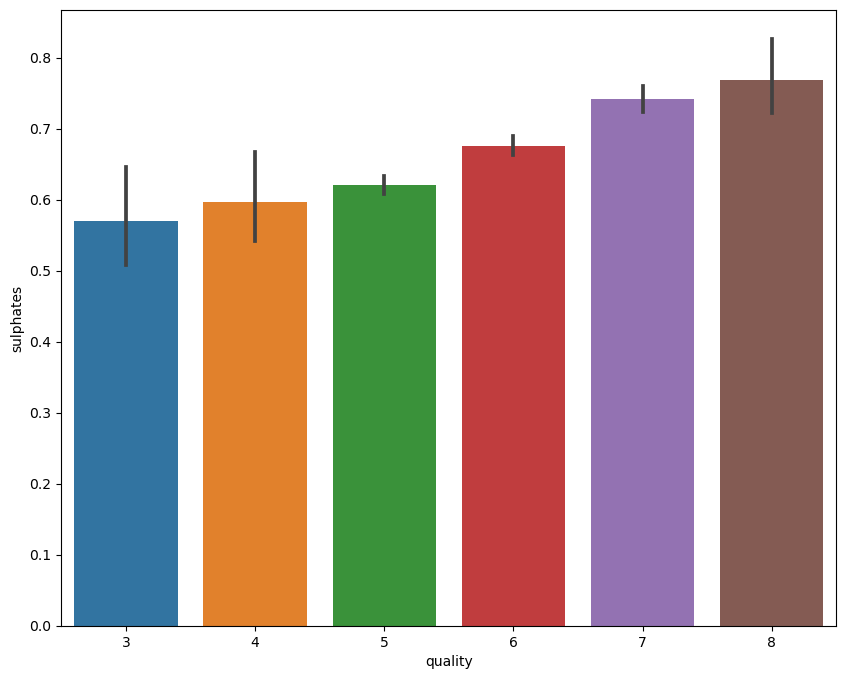

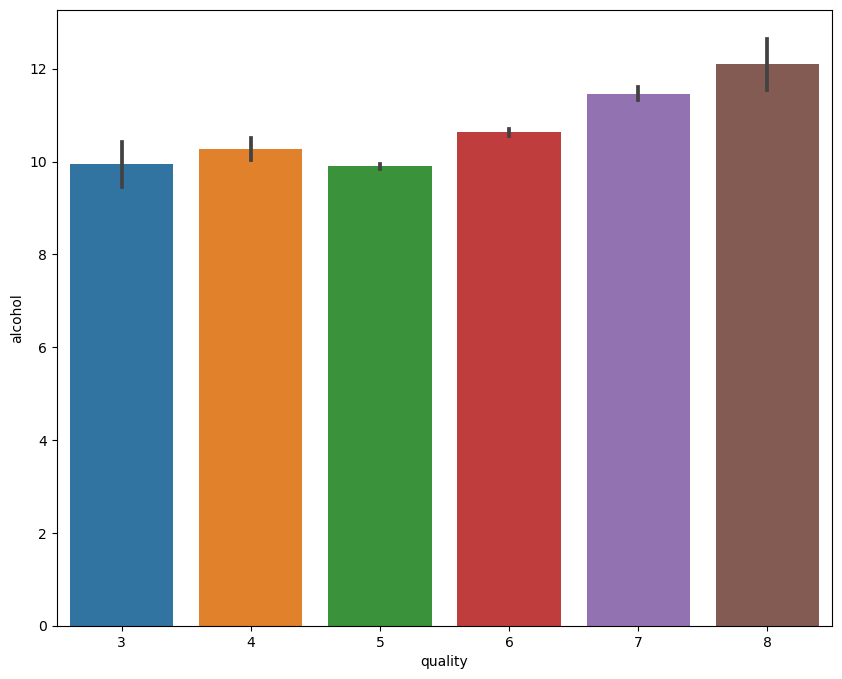

Wall time: 2.91 s


In [8]:
%%time

wine_data=df.columns.drop('quality')
for wd in wine_data:
    fig=plt.figure(figsize=(10,8))
    sns.barplot(x=df['quality'], y=df[wd])
    plt.show()

In [15]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [16]:
bins = [2,4,6,9]
labels= ['bad','medium','good']
df['quality']=pd.cut(df['quality'],bins=bins, labels=labels)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,medium
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,medium
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,medium


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


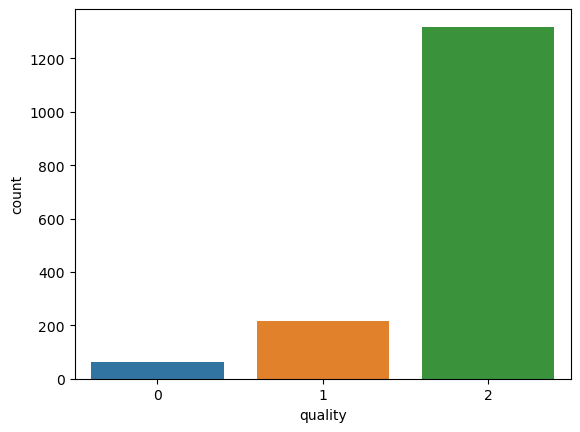

In [18]:
le = LabelEncoder()
df['quality'] = le.fit_transform(df.quality)
sns.countplot(df['quality'])
plt.show()

In [19]:
#Split data into training and testing datasets

X=df.drop(columns='quality')
Y=df['quality']

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30, shuffle=True)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(1119, 11) (480, 11) (1119,) (480,)


In [20]:
#Standardise data for better results

scalar=StandardScaler()
X_train=scalar.fit_transform(X_train)
X_test=scalar.fit_transform(X_test)

In [21]:
%%time

regressor=LogisticRegression(solver='saga', multi_class='multinomial',max_iter=1000)
regressor.fit(X_train,Y_train)

score=regressor.score(X_test,Y_test)
print('accuracy = '+str(score))

accuracy = 0.83125
Wall time: 58 ms
